<a href="https://colab.research.google.com/github/varunkumarprabhakar/Diwali_Sales_Analysis/blob/main/Diwali_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
data=pd.read_csv('/content/Diwali Sales Data.csv',encoding='unicode_escape')
data.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [3]:
data.drop(['Status','unnamed1'], axis=1,inplace=True)

In [4]:
pd.isnull(data).sum()

,0
User_ID,0
Cust_name,0
Product_ID,0
Gender,0
Age Group,0
Age,0
Marital_Status,0
State,0
Zone,0
Occupation,0


In [5]:
data.dropna(inplace=True)

In [6]:
pd.isnull(data).sum()

,0
User_ID,0
Cust_name,0
Product_ID,0
Gender,0
Age Group,0
Age,0
Marital_Status,0
State,0
Zone,0
Occupation,0


In [7]:
data['Amount']=data['Amount'].astype('int')

In [8]:
data['Amount'].dtypes

dtype('int64')

In [9]:
data.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877


In [10]:
data.rename(columns={'Marital_Status':'Shaadi'})

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Shaadi,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [11]:
data[['Age','Amount']].describe()

,Age,Amount
count,11239.000000,11239.000000
mean,35.410357,9453.610553
std,12.753866,5222.355168
min,12.000000,188.000000
25%,27.000000,5443.000000
50%,33.000000,8109.000000
75%,43.000000,12675.000000
max,92.000000,23952.000000


# Exploratory Data Analysis

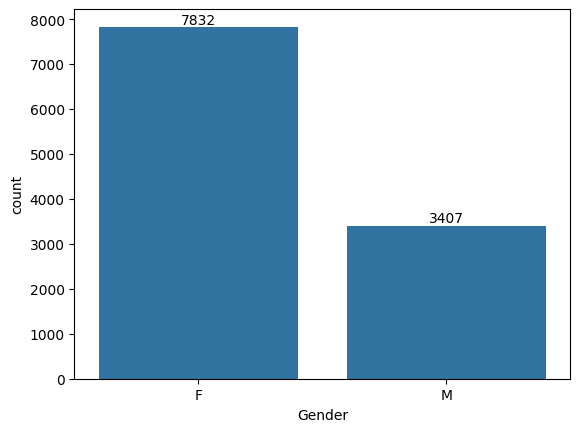

In [12]:
ax=sb.countplot(x='Gender',data=data)
for i in ax.containers:
    ax.bar_label(i)

In [13]:
sales_gen=data.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

<Axes: xlabel='Gender', ylabel='Amount'>

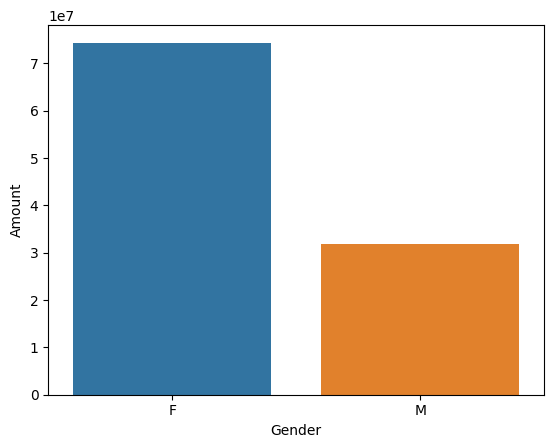

In [20]:
sb.barplot(x='Gender',y='Amount',hue='Gender',data=sales_gen)

*From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men*

# Age

In [16]:
data.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

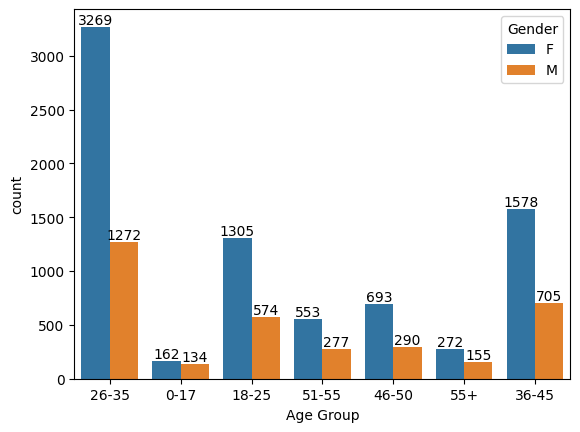

In [21]:
agr=sb.countplot(data=data,x='Age Group',hue='Gender')
for bar in agr.containers:
  agr.bar_label(bar)


In [23]:
sales_ag=data.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

<Axes: xlabel='Age Group', ylabel='Amount'>

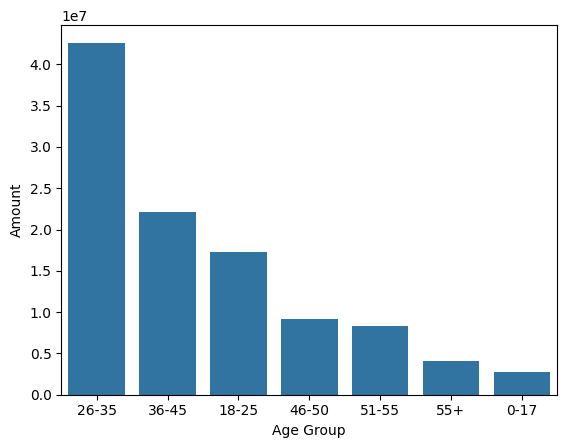

In [24]:
sb.barplot(x='Age Group',y='Amount',data=sales_ag)

*From above graphs we can see that most of the buyers are of age group between 26-35 yrs female*

# State

In [25]:
data.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<Axes: xlabel='State', ylabel='Orders'>

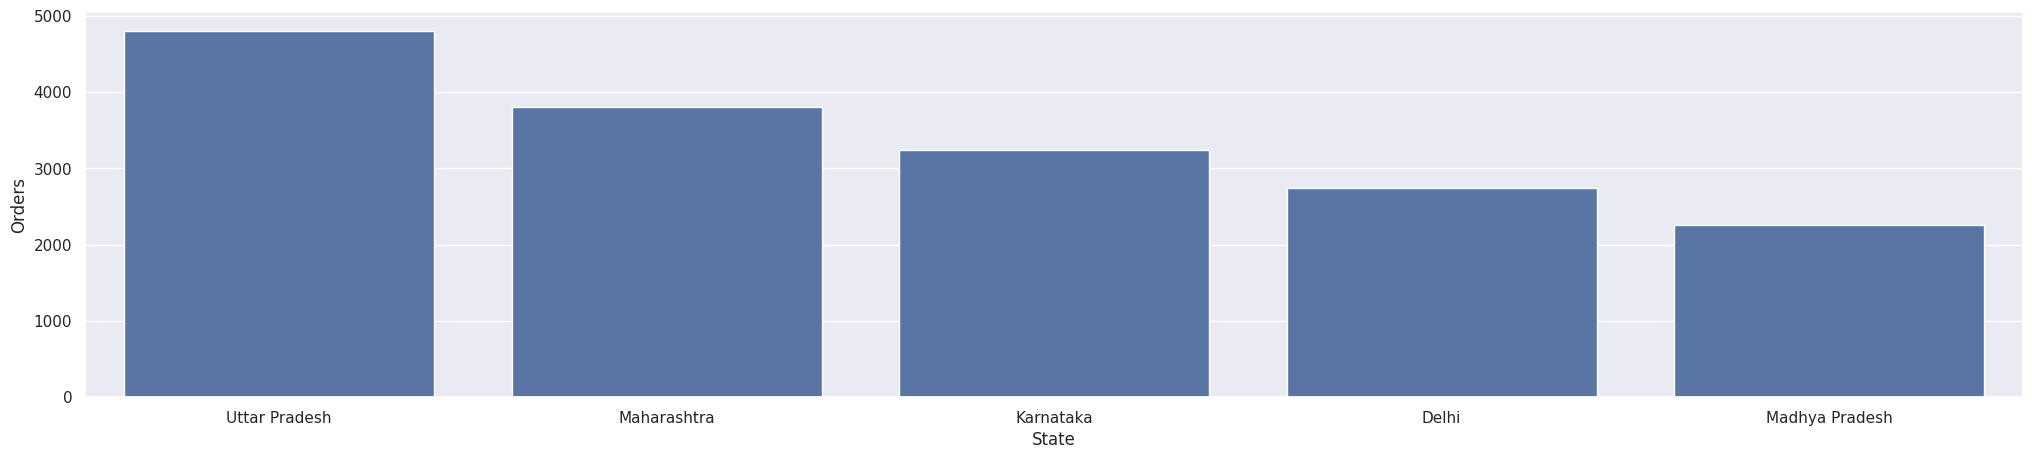

In [34]:
so=data.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head()
sb.set(rc={'figure.figsize':[25,5]})
sb.barplot(x='State',y='Orders',data=so)

<Axes: xlabel='State', ylabel='Amount'>

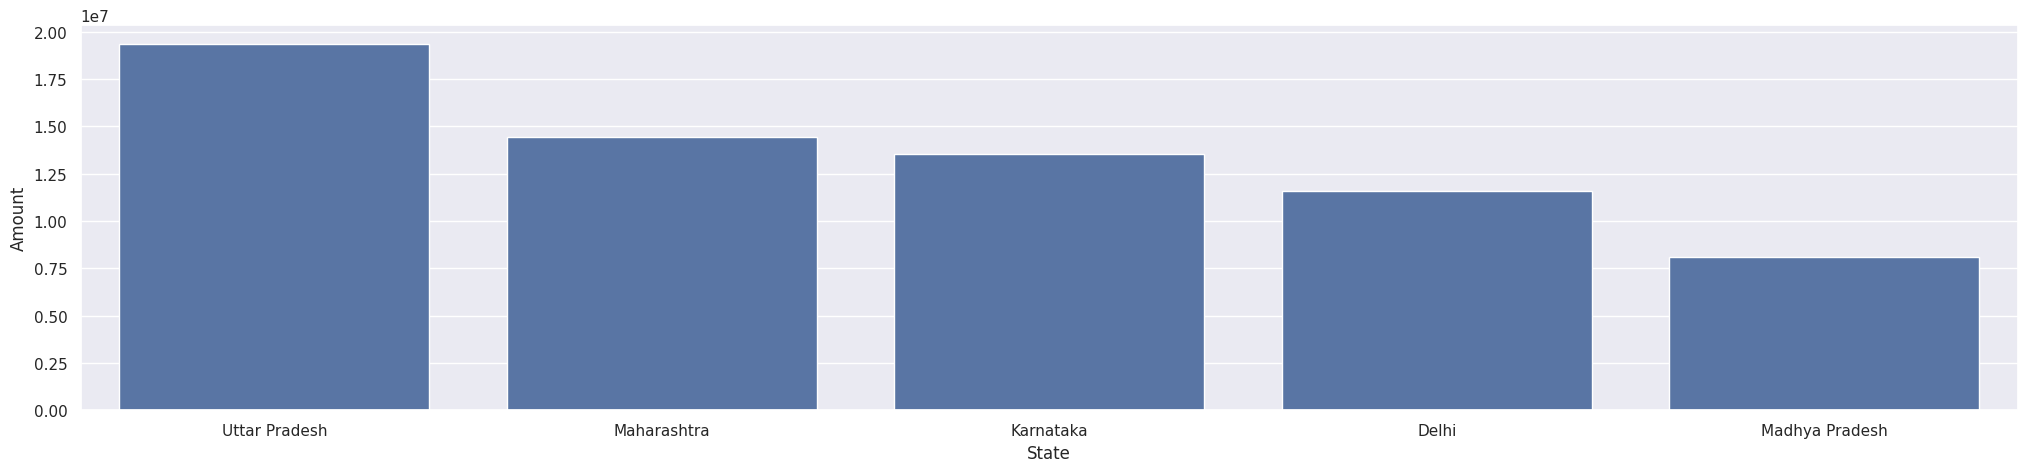

In [36]:
sa=data.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head()
sb.barplot(x='State',y='Amount',data=sa)

*From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra,Karnataka & Delhi respectively*

# Marital_Status

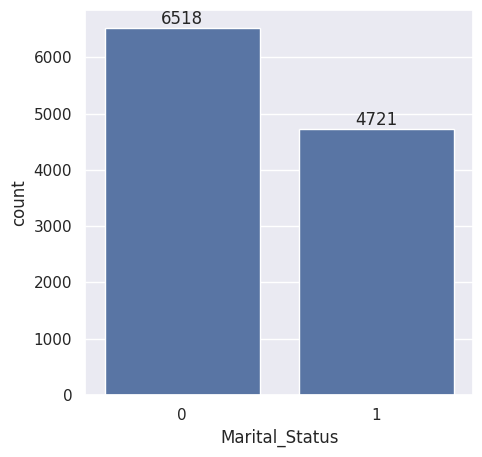

In [42]:
ms=sb.countplot(x='Marital_Status',data=data)
sb.set(rc={'figure.figsize':[4,4]})
for bar in ms.containers:
  ms.bar_label(bar)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

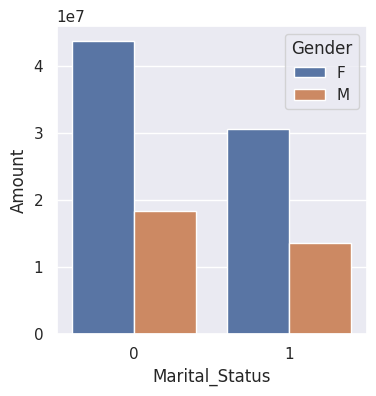

In [45]:
ma=data.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sb.barplot(data=ma,x='Marital_Status',y='Amount',hue='Gender')

*From above graphs we can see that most of the buyers are married (women) and they have high purchasing power*

# Occupation

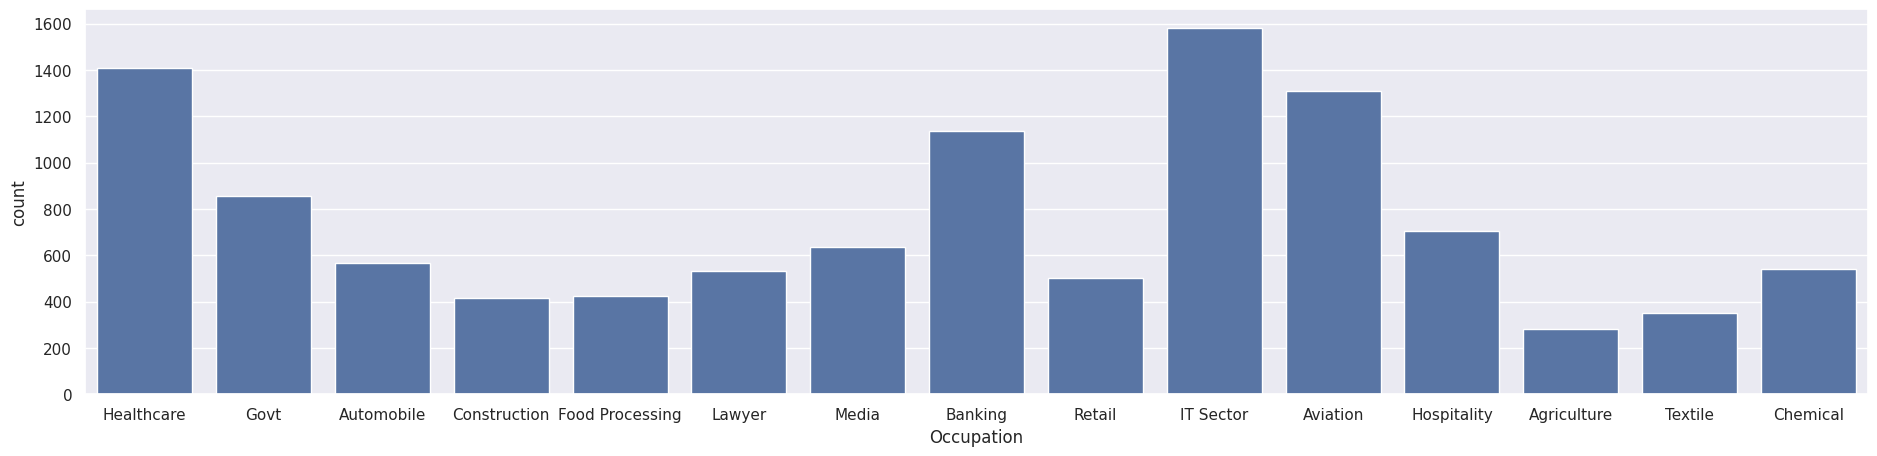

In [51]:
sb.set(rc={'figure.figsize':[23,5]})
oc=sb.countplot(x='Occupation',data=data)

<Axes: xlabel='Occupation', ylabel='Amount'>

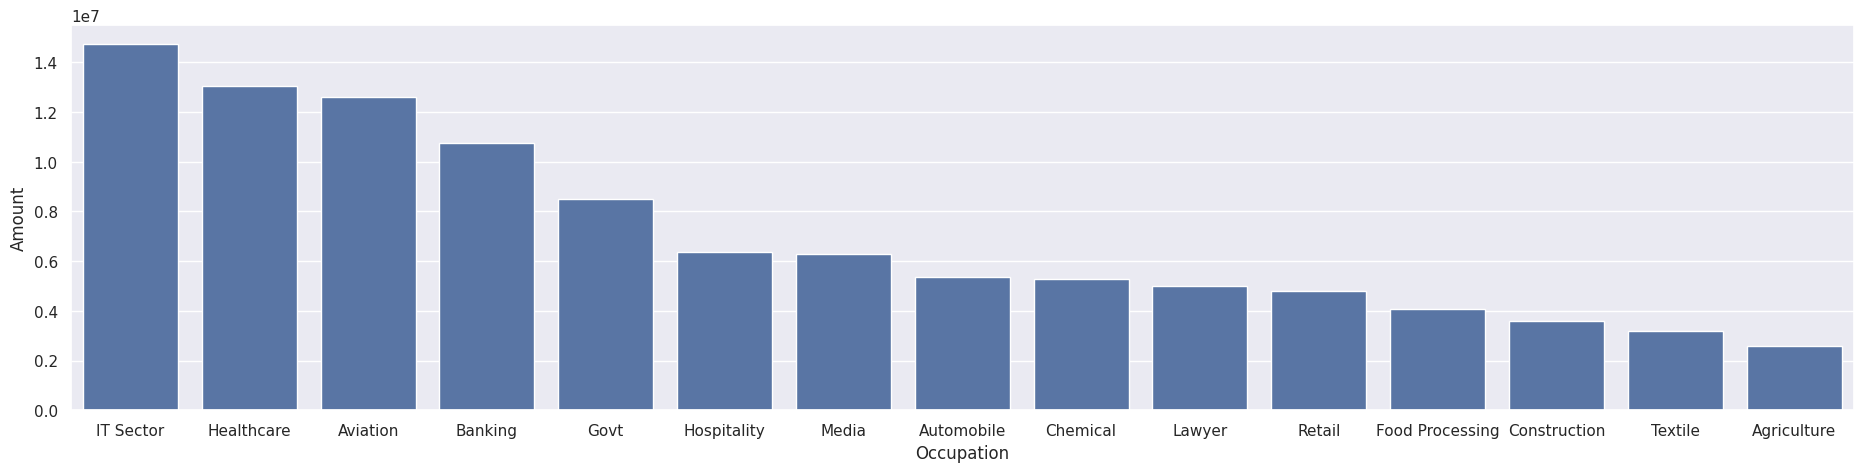

In [54]:
oa=data.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sb.barplot(x='Occupation',y='Amount',data=oa)

*From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector*

# Product Category

In [55]:
data.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

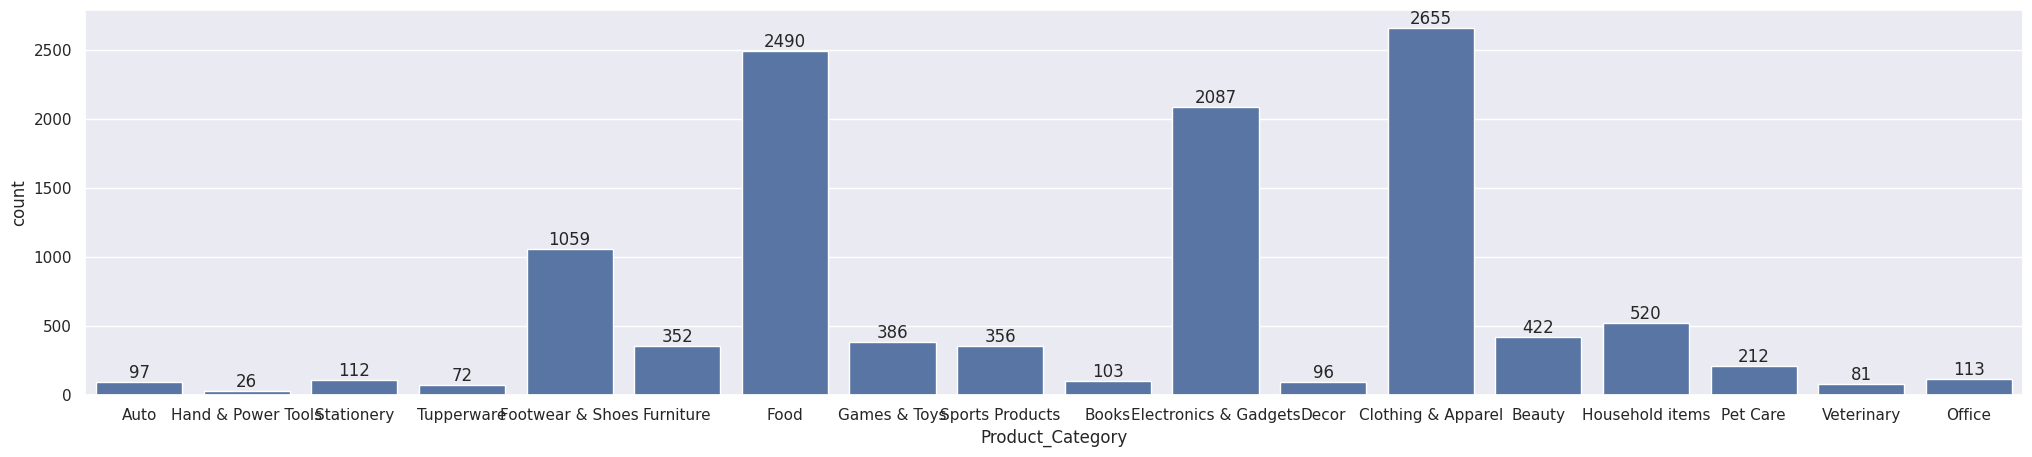

In [62]:
pc=sb.countplot(x='Product_Category',data=data)
sb.set(rc={'figure.figsize':[30,5]})
for bar in pc.containers:
  pc.bar_label(bar)

<Axes: xlabel='Product_Category', ylabel='Amount'>

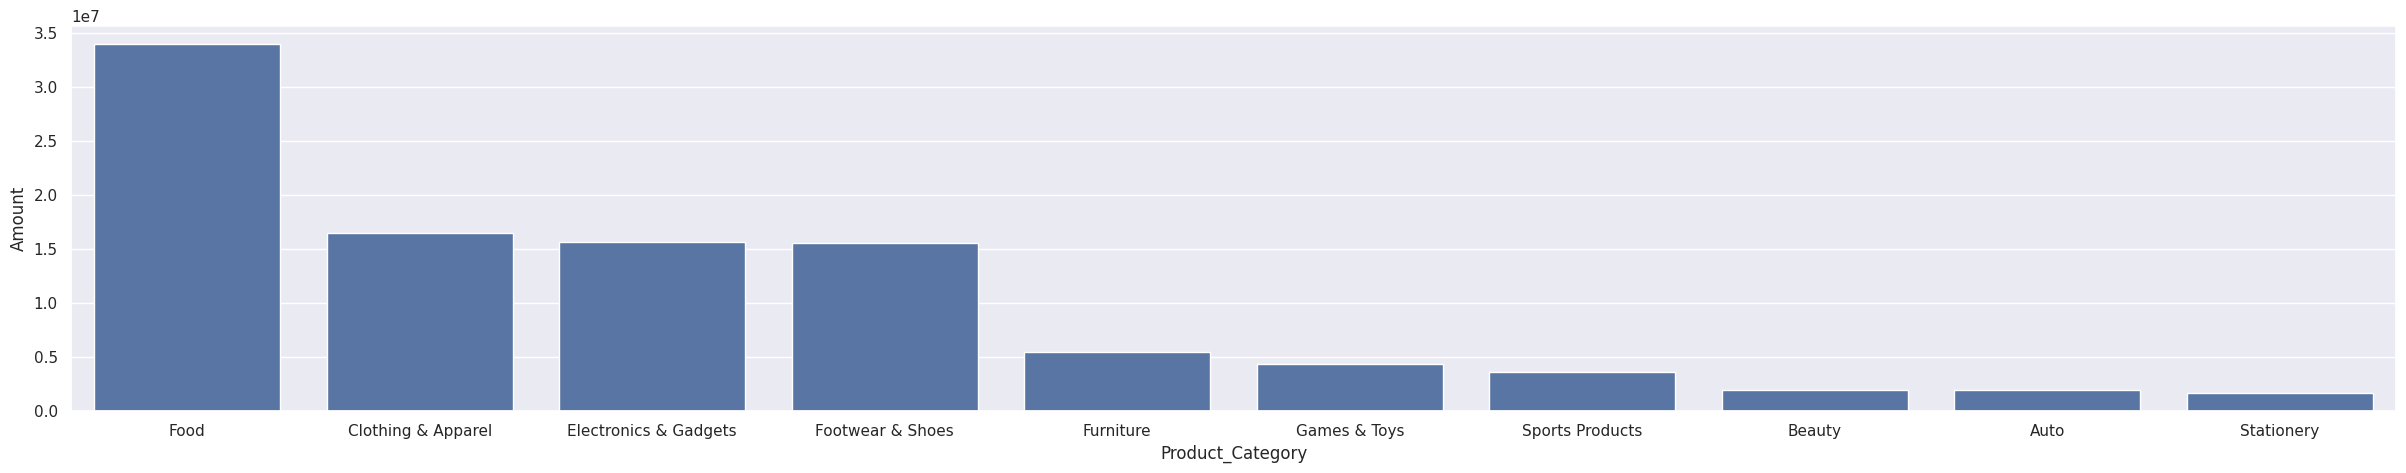

In [63]:
pca=data.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sb.barplot(x='Product_Category',y='Amount',data=pca)

*From above graphs we can see that most of the sold products are from Food, Clothing, Electronics,Footwear & shoes category*

<Axes: xlabel='Product_ID', ylabel='Orders'>

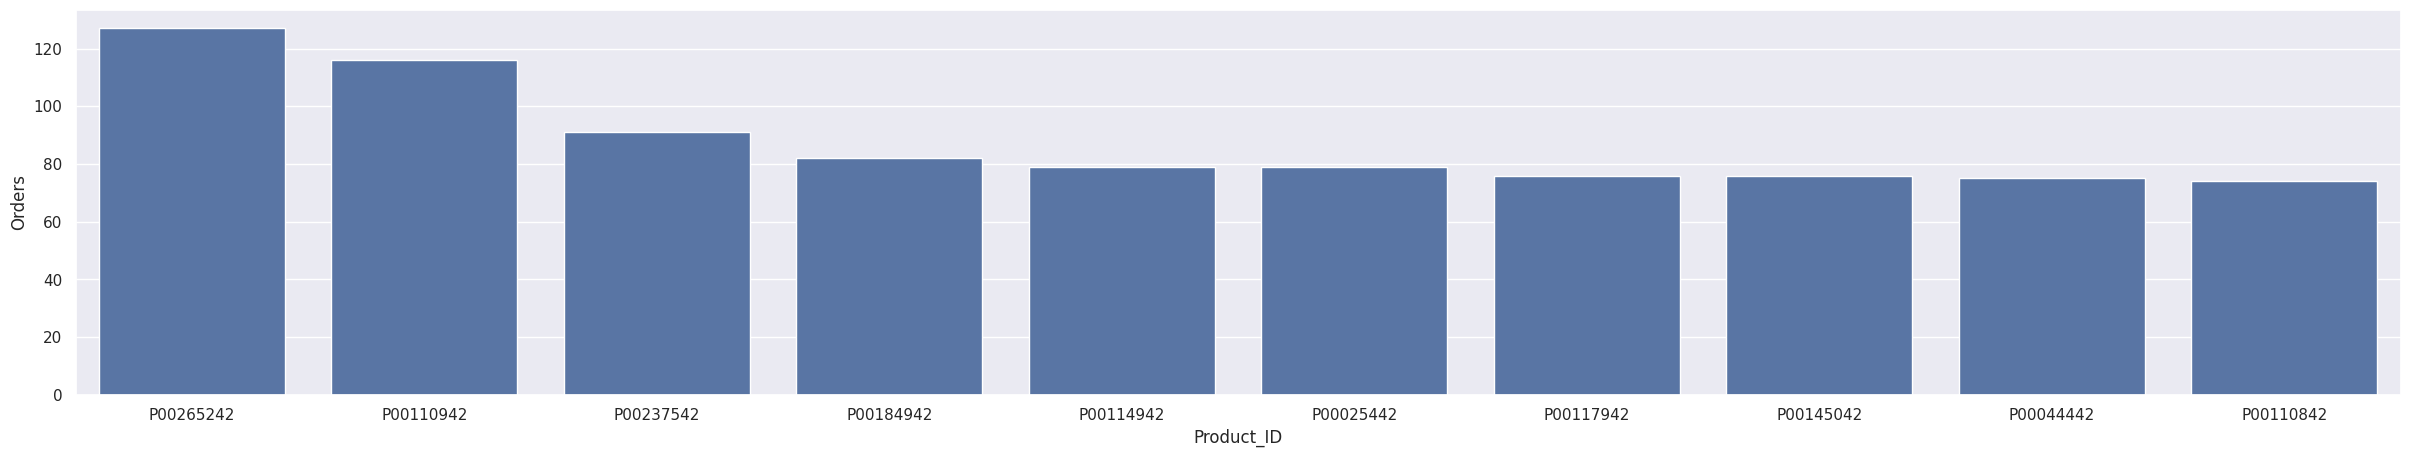

In [68]:
pio=data.groupby(['Product_ID'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
sb.barplot(x='Product_ID',y='Orders',data=pio)

# **Summary**

# *Married women age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category*